In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib
import math

# Problem 1, question a)

In [11]:
from sklearn.datasets import load_breast_cancer
raw_data = load_breast_cancer()

In [12]:
data = raw_data.data

In [13]:
data.shape

(569, 30)

In [14]:
features = raw_data.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [15]:
features.size

30

In [16]:
labels = raw_data.target
labels.shape

(569,)

In [17]:
print((data[labels ==0, 0]).size)
print((data[labels ==1, 0]).size)

212
357


# Problem 1, question b)

In [18]:
corr = np.corrcoef(data.T) #We need to transpose because in np.corrcoef, each row of x represents a variable, and each column a single observation of all those variables.

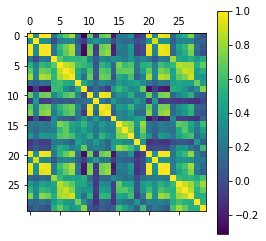

In [19]:
plt.matshow(corr);
plt.colorbar()
plt.show()

In [20]:
r = np.where(corr[0,:]>0.9)
r

(array([ 0,  2,  3, 20, 22, 23]),)

In [21]:
for i in r:
    print(features[i])

['mean radius' 'mean perimeter' 'mean area' 'worst radius'
 'worst perimeter' 'worst area']


In [22]:
r = np.where(corr[1,:]>0.9)
r

(array([ 1, 21]),)

In [23]:
for i in r:
    print(features[i])

['mean texture' 'worst texture']


# Problem 1, question c)

In [24]:
eigvals, eigvecs = np.linalg.eig(corr)

In [25]:
frac_eigvals=eigvals/np.sum(eigvals)
frac_eigvals

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 4.43482743e-06,
       2.49601032e-05, 5.29779290e-05, 2.30015463e-04, 2.72587995e-04,
       5.16042379e-04, 6.01833567e-04, 8.11361259e-04, 9.14646751e-04,
       1.03864675e-03, 9.99096464e-04])

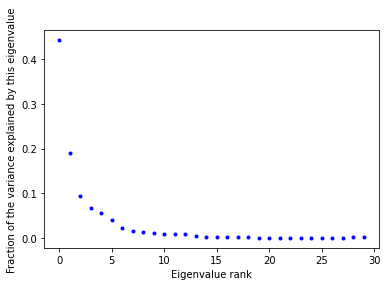

In [26]:
plt.plot(frac_eigvals,'b.')
ax = plt.gca()
ax.set_xlabel("Eigenvalue rank")
ax.set_ylabel("Fraction of the variance explained by this eigenvalue")
plt.show()

In [27]:
cum_eigvals=np.cumsum(frac_eigvals)
cum_eigvals

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99453783,
       0.99456279, 0.99461577, 0.99484578, 0.99511837, 0.99563442,
       0.99623625, 0.99704761, 0.99796226, 0.9990009 , 1.        ])

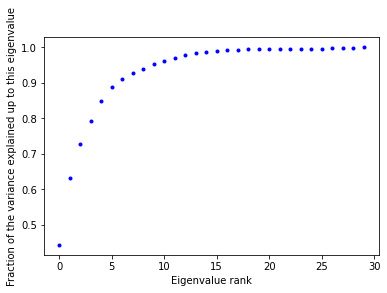

In [28]:
plt.plot(cum_eigvals,'b.')
ax = plt.gca()
ax.set_xlabel("Eigenvalue rank")
ax.set_ylabel("Fraction of the variance explained up to this eigenvalue")
plt.show()

# Problem 1, question d)

In [29]:
from sklearn.preprocessing import StandardScaler
datascaled = StandardScaler().fit_transform(data) # normalizing the features
datascaled.shape

(569, 30)

In [30]:
np.mean(datascaled[:,0])

-3.153111437248248e-15

In [31]:
np.var(datascaled[:,0])

0.9999999999999996

In [32]:
newdata=np.matmul(datascaled,eigvecs)
newdata.shape

(569, 30)

<Figure size 432x288 with 0 Axes>

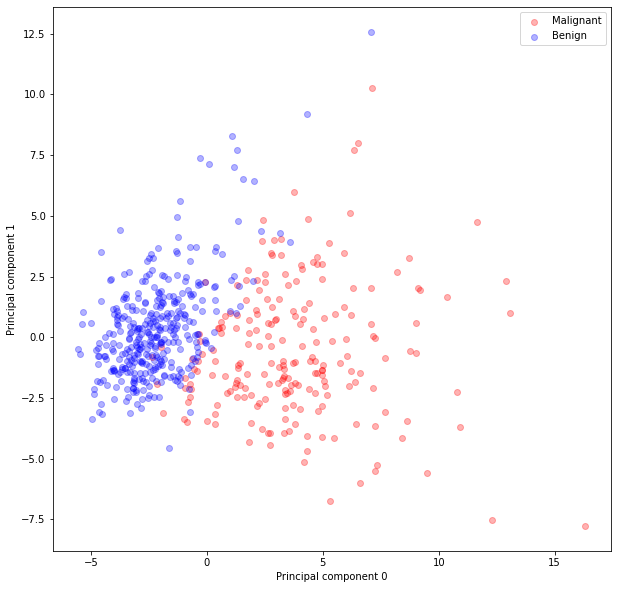

In [25]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Principal component 0')
plt.ylabel('Principal component 1')
diagn = [0, 1]
colors = ['r', 'b']
for i in diagn:
    indicesToKeep = labels == diagn[i]
    plt.scatter(newdata[indicesToKeep, 0], newdata[indicesToKeep, 1], c = colors[i],alpha=0.3)
plt.legend(['Malignant','Benign'])
plt.show()

# Problem 1, question e)

In [33]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
newdata2 = sklearn_pca.fit_transform(datascaled)

<Figure size 432x288 with 0 Axes>

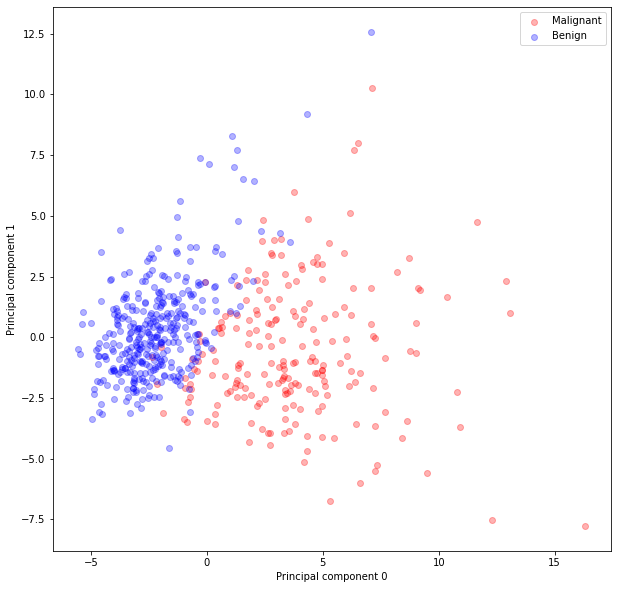

In [34]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Principal component 0')
plt.ylabel('Principal component 1')
diagn = [0, 1]
colors = ['r', 'b']
for i in diagn:
    indicesToKeep = labels == diagn[i]
    plt.scatter(newdata2[indicesToKeep, 0], newdata2[indicesToKeep, 1], c = colors[i], alpha=0.3)
plt.legend(['Malignant','Benign'])
plt.show()

# Problem 1, question f)

<Figure size 432x288 with 0 Axes>

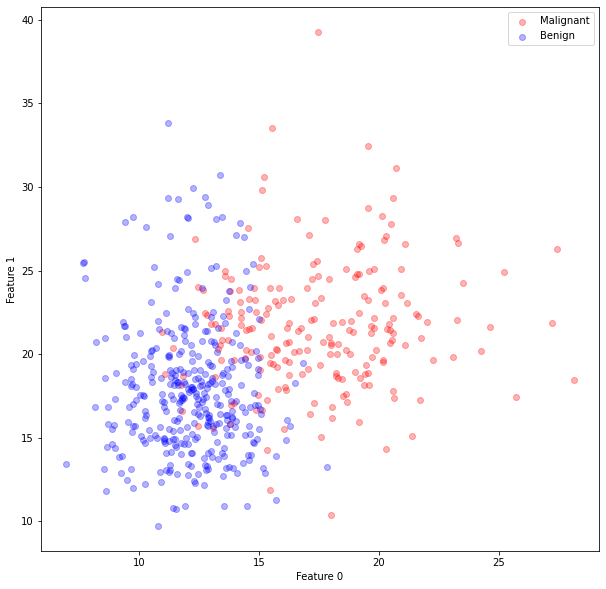

In [35]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
diagn = [0, 1]
colors = ['r', 'b']
for i in diagn:
    indicesToKeep = labels == diagn[i]
    plt.scatter(data[indicesToKeep, 0], data[indicesToKeep, 1], c = colors[i], alpha=0.3)
plt.legend(['Malignant','Benign'])
plt.show()

# Problem 1, question g)

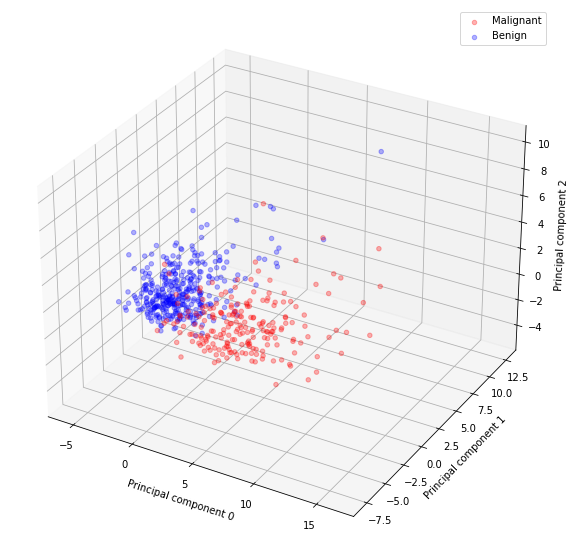

In [29]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.set_xlabel('Principal component 0')
ax.set_ylabel('Principal component 1')
ax.set_zlabel('Principal component 2')
diagn = [0, 1]
colors = ['r', 'b']
for i in diagn:
    indicesToKeep = labels == diagn[i]
    ax.scatter3D(newdata[indicesToKeep, 0], newdata[indicesToKeep, 1], newdata[indicesToKeep, 2], c = colors[i], alpha=0.3)
ax.legend(['Malignant','Benign'])
plt.show()

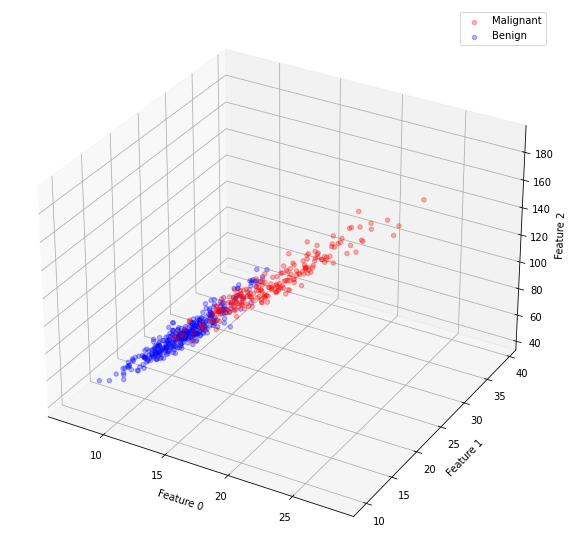

In [30]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')
ax.set_zlabel('Feature 2')
diagn = [0, 1]
colors = ['r', 'b']
for i in diagn:
    indicesToKeep = labels == diagn[i]
    ax.scatter3D(data[indicesToKeep, 0], data[indicesToKeep, 1], data[indicesToKeep, 2], c = colors[i], alpha=0.3)
ax.legend(['Malignant','Benign'])
plt.show()

# Problem 1, question h)

In [31]:
#installation of UMAP: pip install umap-learn

In [32]:
import umap

In [33]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(datascaled)
embedding.shape

(569, 2)

<Figure size 432x288 with 0 Axes>

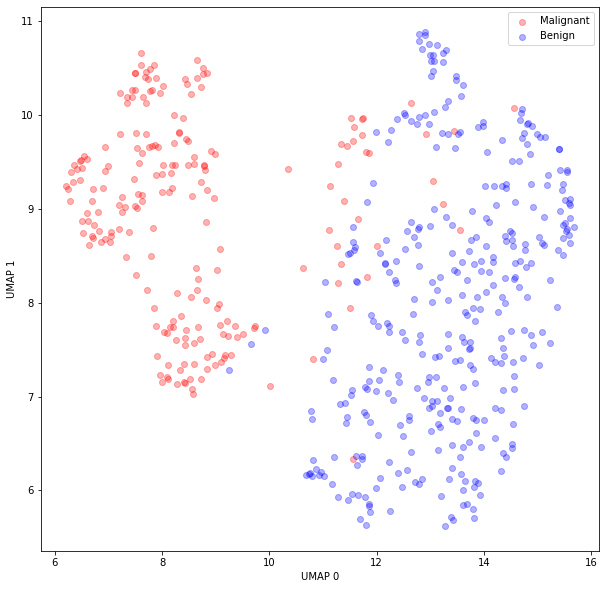

In [34]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('UMAP 0')
plt.ylabel('UMAP 1')
diagn = [0, 1]
colors = ['r', 'b']
for i in diagn:
    indicesToKeep = labels == diagn[i]
    plt.scatter(embedding[indicesToKeep, 0], embedding[indicesToKeep, 1], c = colors[i], alpha=0.3)
plt.legend(['Malignant','Benign'])
plt.show()

# Problem 1, question i)

In [35]:
from sklearn.manifold import TSNE
embedding2 = TSNE(n_components=2).fit_transform(datascaled)
embedding2.shape

(569, 2)

<Figure size 432x288 with 0 Axes>

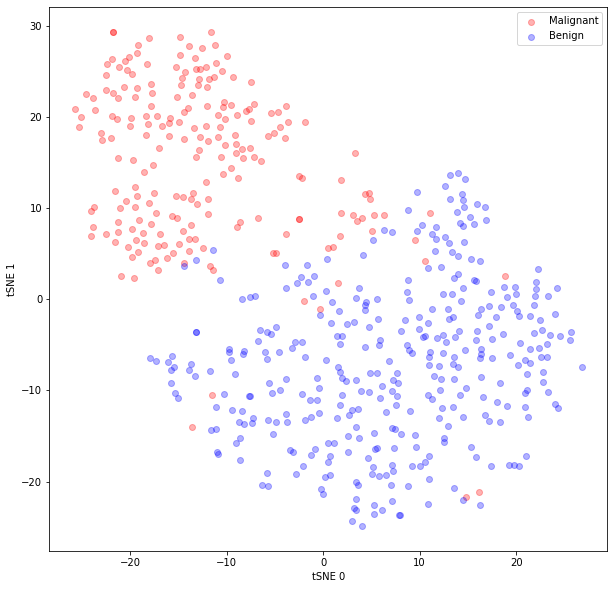

In [36]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('tSNE 0')
plt.ylabel('tSNE 1')
diagn = [0, 1]
colors = ['r', 'b']
for i in diagn:
    indicesToKeep = labels == diagn[i]
    plt.scatter(embedding2[indicesToKeep, 0], embedding2[indicesToKeep, 1], c = colors[i], alpha=0.3)
plt.legend(['Malignant','Benign'])
plt.show()

# Problem 2, question a)

In [2]:
import pandas as pd
mrna=pd.read_csv('Data12.txt',delimiter='\t',skiprows=[0,1,2,3,4,5,6,9,10])  

/var/folders/44/6v3kz4192msd195khdzndz6w0000gq/T/ipykernel_4429/3214839790.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,

In [3]:
mrna

,(none),cell_id,1772071015_C02,1772071017_G12,1772071017_A05,1772071014_B06,1772067065_H06,1772071017_E02,1772067065_B07,1772067060_B09,...,1772066110_D12,1772071017_A07,1772063071_G10,1772058148_C03,1772063061_D09,1772067059_B04,1772066097_D04,1772063068_D01,1772066098_A12,1772058148_F03
0,(none),level1class,interneurons,interneurons,interneurons,interneurons,interneurons,interneurons,interneurons,interneurons,...,endothelial-mural,endothelial-mural,endothelial-mural,endothelial-mural,endothelial-mural,endothelial-mural,endothelial-mural,endothelial-mural,endothelial-mural,endothelial-mural
1,Tspan12,1,0,0,0,3,0,0,3,0,...,0,0,0,0,0,0,0,0,0,1
2,Tshz1,1,3,1,0,2,2,2,2,1,...,0,0,0,0,0,0,0,0,0,1
3,Fnbp1l,1,3,1,6,4,1,2,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Adamts15,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19968,Gm20738_loc4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19969,Gm20738_loc6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19970,Gm21943_loc1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19971,Gm21943_loc3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
mrna_data=(mrna.iloc[1:,2:]).to_numpy(dtype='float')
mrna_data.shape

(19972, 3005)

In [49]:
mrna_labels=list(mrna.iloc[0,2:])
len(mrna_labels)

3005

In [50]:
unlab=np.unique(mrna_labels)
unlab

array(['astrocytes_ependymal', 'endothelial-mural', 'interneurons',
       'microglia', 'oligodendrocytes', 'pyramidal CA1', 'pyramidal SS'],
      dtype='<U20')

# Problem 2, question b)

In [51]:
mrna_data[mrna_data==0]=1
for i in range(np.size(mrna_data[0])):
    mrna_data[:,i]=np.log(mrna_data[:,i]/np.sum(mrna_data[:,i]))

# Problem 2, question c)

In [52]:
newmrna = sklearn_pca.fit_transform(mrna_data.T)
newmrna.shape

(3005, 2)

<Figure size 432x288 with 0 Axes>

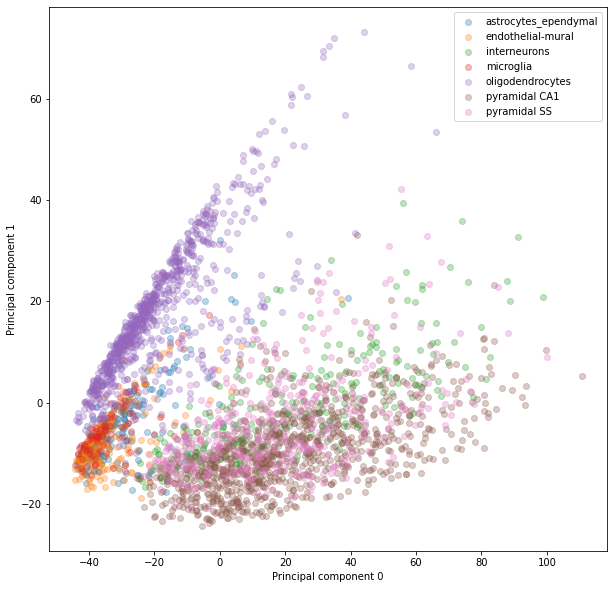

In [53]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Principal component 0')
plt.ylabel('Principal component 1')
for lab in unlab:
    indicesToKeep = [i for i, j in enumerate(mrna_labels) if j == lab] 
    plt.scatter(newmrna[indicesToKeep, 0], newmrna[indicesToKeep, 1], alpha=0.3)
plt.legend(unlab)
plt.show()

# Problem 2, question d)

In [54]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(mrna_data.T)
embedding.shape

(3005, 2)

<Figure size 432x288 with 0 Axes>

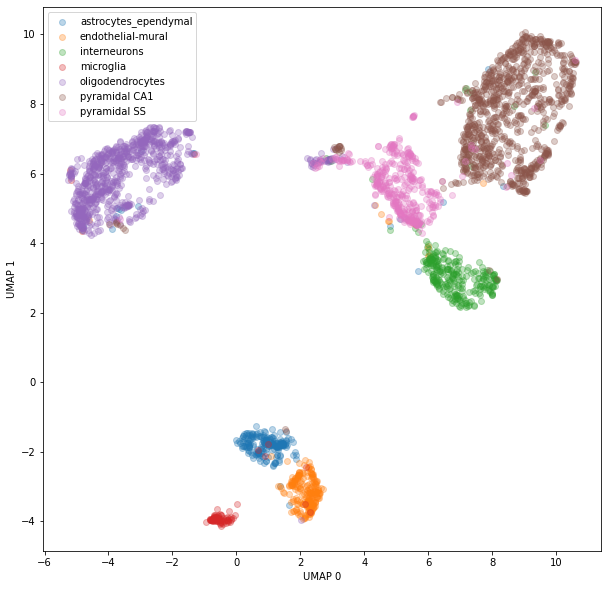

In [55]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('UMAP 0')
plt.ylabel('UMAP 1')
for lab in unlab:
    indicesToKeep = [i for i, j in enumerate(mrna_labels) if j == lab] 
    plt.scatter(embedding[indicesToKeep, 0], embedding[indicesToKeep, 1], alpha=0.3)
plt.legend(unlab)
plt.show()

# Problem 2, question e)

In [56]:
embedding2 = TSNE(n_components=2,init='pca').fit_transform(mrna_data.T)
embedding2.shape

(3005, 2)

<Figure size 432x288 with 0 Axes>

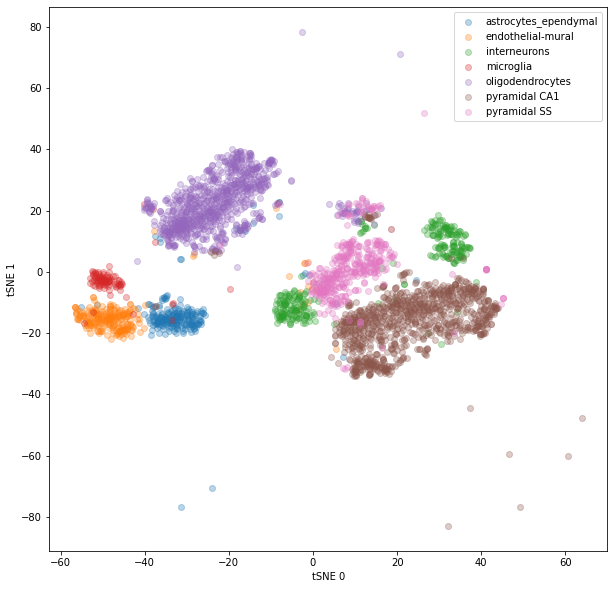

In [57]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('tSNE 0')
plt.ylabel('tSNE 1')
for lab in unlab:
    indicesToKeep = [i for i, j in enumerate(mrna_labels) if j == lab] 
    plt.scatter(embedding2[indicesToKeep, 0], embedding2[indicesToKeep, 1], alpha=0.3)
plt.legend(unlab)
plt.show()